In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Load dataset
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies_metadata.csv', low_memory=False)

In [ ]:
# Preprocessing movies_metadata
movies = movies.copy()
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
movies = movies.dropna(subset=['id'])  
movies['id'] = movies['id'].astype(int)

In [4]:
# Ambil genre pertama saja
def extract_first_genre(genres_str):
    try:
        genres = ast.literal_eval(genres_str)
        if isinstance(genres, list) and genres:
            return genres[0]['name']
    except:
        return np.nan
    return np.nan

movies['first_genre'] = movies['genres'].apply(extract_first_genre)

In [5]:
# Join ke ratings
df = ratings.merge(movies[['id', 'first_genre']], left_on='movieId', right_on='id', how='left')

In [6]:
# Drop missing genres
df = df.dropna(subset=['first_genre'])

In [7]:
df_sampled = df.sample(n=1_000_000, random_state=42)

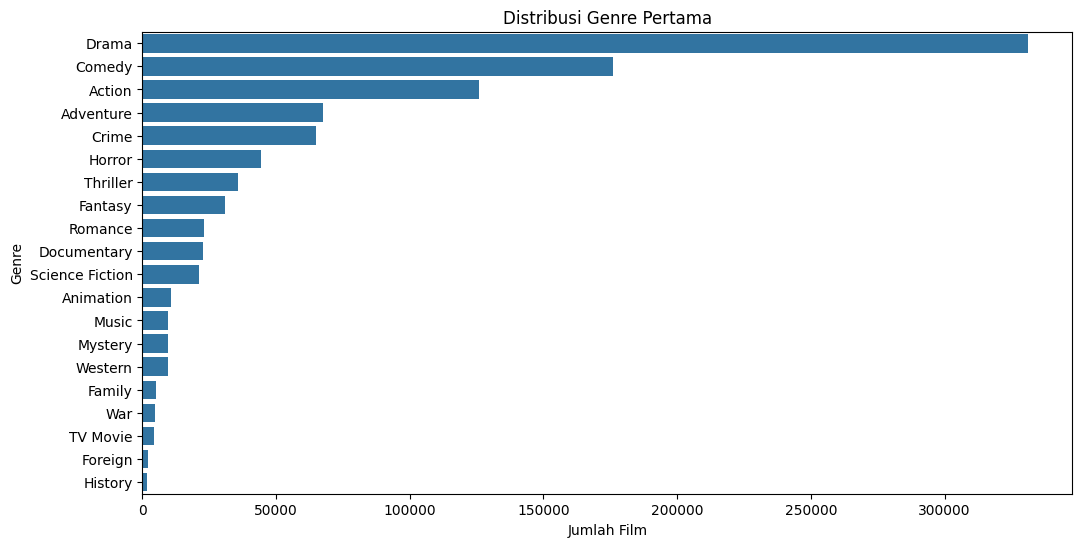

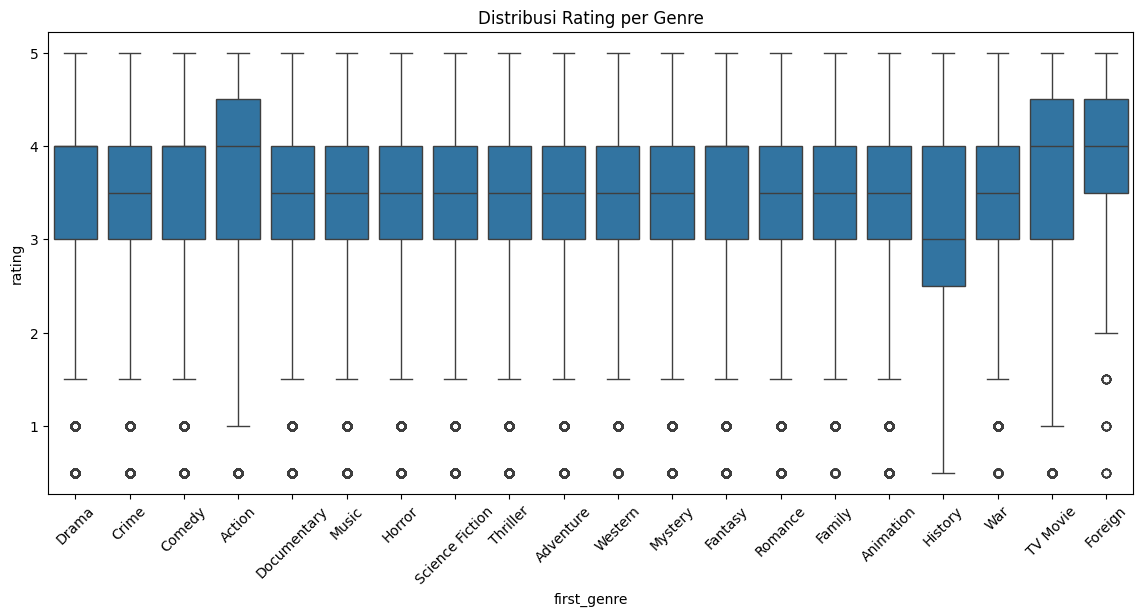

In [8]:
# EDA Genre
plt.figure(figsize=(12, 6))
sns.countplot(data=df_sampled, y='first_genre', order=df_sampled['first_genre'].value_counts().index)
plt.title("Distribusi Genre Pertama")
plt.xlabel("Jumlah Film")
plt.ylabel("Genre")
plt.show()

# Distribusi rating berdasarkan genre
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_sampled, x='first_genre', y='rating')
plt.title("Distribusi Rating per Genre")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Encoding genre
le = LabelEncoder()
df_sampled['genre_encoded'] = le.fit_transform(df_sampled['first_genre'])

In [10]:
# Model 1: tanpa genre
X1 = df_sampled[['userId', 'movieId', 'timestamp']]
y = df_sampled['rating']

In [11]:
# Model 2: tambah genre
X2 = df_sampled[['userId', 'movieId', 'timestamp', 'genre_encoded']]

In [12]:
# Split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [14]:
# Train model
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model1.fit(X1_train, y1_train)

model2 = RandomForestRegressor(n_jobs=-1, random_state=42)
model2.fit(X2_train, y2_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# model1 = DecisionTreeRegressor(random_state=42)
# model1.fit(X1_train, y1_train)

# model2 = DecisionTreeRegressor(random_state=42)
# model2.fit(X2_train, y2_train)

In [15]:
# Evaluate
pred1 = model1.predict(X1_test)
pred2 = model2.predict(X2_test)

rmse1 = np.sqrt(mean_squared_error(y1_test, pred1))
rmse2 = np.sqrt(mean_squared_error(y2_test, pred2))

print(f"Model tanpa genre - RMSE: {rmse1:.4f}")
print(f"Model dengan genre - RMSE: {rmse2:.4f}")

Model tanpa genre - RMSE: 1.0279
Model dengan genre - RMSE: 1.0263
